<a href="https://colab.research.google.com/github/VidhyaKishor27/Pythonbasic/blob/main/Miniproject_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1:

In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
eb=pd.read_csv('/content/drive/MyDrive/Python training/Miniproject - python/ebola_data_db_format.csv')
print(eb.head(3))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                           Indicator Country        Date  \
0  Cumulative number of confirmed, probable and s...  Guinea  2015-03-10   
1         Cumulative number of confirmed Ebola cases  Guinea  2015-03-10   
2          Cumulative number of probable Ebola cases  Guinea  2015-03-10   

    value  
0  3285.0  
1  2871.0  
2   392.0  


1. Distinct # of Indicators in the universe (complete dataset).
Output:
Integer value


In [ ]:
unique_indicator=eb['Indicator'].nunique()
print("No. of Distinct Indicators:",unique_indicator)

No. of Distinct Indicators: 36


2. In the second half of the year 2015, how many countries have one or more “Cumulative number of confirmed Ebola cases”
Output:
Integer value


In [ ]:
eb['Date']=pd.to_datetime(eb['Date'])
eb['year'] = eb['Date'].dt.year
eb['month'] = eb['Date'].dt.month
filtered_data = eb[(eb['Indicator'] == "Cumulative number of confirmed Ebola cases") & (eb['year'] == 2015) & (eb['month'] > 6)]
country=filtered_data['Country'].nunique()
print("No. of Countries having one or more \" Cumulative no of confirmed Ebola cases\" are:",country)

No. of Countries having one or more " Cumulative no of confirmed Ebola cases" are: 11


3. Top 10 total Ebola cases confirmed. Note that Indicator = Cumulative number of confirmed Ebola cases. Include rank based on the total value (=cases confirmed).
Output:
country, total_value, rank


In [ ]:
question3=eb[eb['Indicator']=="Cumulative number of confirmed Ebola cases"]
top10_ebola=question3.groupby(['Country'])['value'].count().to_frame('TotalValue').sort_values(by='TotalValue',ascending=False).reset_index()
top10_ebola['Rank']=top10_ebola['TotalValue'].rank(ascending=False)
print(tabulate(top10_ebola.head(10),headers=['Country','Total Value','Rank'],tablefmt='grid'))


+----+--------------------------+---------------+--------+
|    | Country                  |   Total Value |   Rank |
+====+==========================+===============+========+
|  0 | Guinea                   |           259 |    1.5 |
+----+--------------------------+---------------+--------+
|  1 | Sierra Leone             |           259 |    1.5 |
+----+--------------------------+---------------+--------+
|  2 | Liberia                  |           258 |    3   |
+----+--------------------------+---------------+--------+
|  3 | Nigeria                  |           255 |    4   |
+----+--------------------------+---------------+--------+
|  4 | Senegal                  |           254 |    5   |
+----+--------------------------+---------------+--------+
|  5 | United States of America |           245 |    6   |
+----+--------------------------+---------------+--------+
|  6 | Mali                     |           243 |    7.5 |
+----+--------------------------+---------------+-------

4. Top 10 countries that have total cases with Indicator = “Cumulative number of confirmed probable and suspected Ebola deaths” in 2015 Q2 (i.e., April-June 2015).
Output:
country, total_cases, rank


In [ ]:
question4= eb[(eb['Indicator'] == "Cumulative number of confirmed, probable and suspected Ebola deaths") & (eb['month'] > 3) & (eb['month'] > 7)]
Q2_eboladeath=question4.groupby(['Country'])['value'].count().to_frame('TotalCases').sort_values(by='TotalCases',ascending=False).reset_index()
Q2_eboladeath['Rank']=Q2_eboladeath['TotalCases'].rank(ascending=False)
print(tabulate(Q2_eboladeath.head(10),headers=['Country','Total Cases','Rank'],tablefmt='grid'))

+----+--------------------------+---------------+--------+
|    | Country                  |   Total Cases |   Rank |
+====+==========================+===============+========+
|  0 | Guinea                   |           121 |    2.5 |
+----+--------------------------+---------------+--------+
|  1 | Liberia                  |           121 |    2.5 |
+----+--------------------------+---------------+--------+
|  2 | Nigeria                  |           121 |    2.5 |
+----+--------------------------+---------------+--------+
|  3 | Sierra Leone             |           121 |    2.5 |
+----+--------------------------+---------------+--------+
|  4 | Senegal                  |           120 |    5   |
+----+--------------------------+---------------+--------+
|  5 | United States of America |           111 |    6   |
+----+--------------------------+---------------+--------+
|  6 | Spain                    |           109 |    7   |
+----+--------------------------+---------------+-------

5. Top 10 countries that have total cases with Indicator = “Cumulative number of confirmed probable and suspected Ebola deaths” with only even months of the year 2015 (i.e., months 2, 4, 6, 8, 10, 12).
Output:
country, total_cases, rank


In [ ]:
filtered_2015=eb[eb['year']==2015]
filtered_2015['month category']=['Odd' if month%2 !=0 else 'Even' for month in filtered_2015['month']]
evenmonth=filtered_2015[(filtered_2015['month category'] == 'Even') & (filtered_2015['Indicator']=='Cumulative number of confirmed, probable and suspected Ebola deaths')]
top10_que5=evenmonth.groupby(['Country'])['value'].count().to_frame('TotalCases').sort_values(by='TotalCases',ascending=False).reset_index()
top10_que5['Rank']=top10_que5['TotalCases'].rank(ascending=False)
print(tabulate(top10_que5.head(10),headers=['Country','Total Cases','Rank'],tablefmt='grid'))

+----+--------------------------+---------------+--------+
|    | Country                  |   Total Cases |   Rank |
+====+==========================+===============+========+
|  0 | Guinea                   |           105 |      5 |
+----+--------------------------+---------------+--------+
|  1 | Liberia                  |           105 |      5 |
+----+--------------------------+---------------+--------+
|  2 | Mali                     |           105 |      5 |
+----+--------------------------+---------------+--------+
|  3 | Nigeria                  |           105 |      5 |
+----+--------------------------+---------------+--------+
|  4 | Senegal                  |           105 |      5 |
+----+--------------------------+---------------+--------+
|  5 | Sierra Leone             |           105 |      5 |
+----+--------------------------+---------------+--------+
|  6 | Spain                    |           105 |      5 |
+----+--------------------------+---------------+-------

<ipython-input-35-7fdab2279dd7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_2015['month category']=['Odd' if month%2 !=0 else 'Even' for month in filtered_2015['month']]


6. Find Country and Indicator wise total value. Also, rank on the total_value which is the sum at the Country-Indicator level.
Output:
country, indicator, total_value, country_indicator_rank


In [ ]:
df=eb.groupby(['Country','Indicator'])['value'].count().to_frame('TotalValue').sort_values(by='TotalValue',ascending=False).reset_index()
#city_airport2=df_altitude.groupby (['City','Country'])['Name'].count().to_frame('TotalAirports').sort_values(by='TotalAirports',ascending=False).reset_index()
df['Country-Indicator Rank']=df['TotalValue'].rank(ascending=False)
print(tabulate(df.head(10),headers=['Indicator','Total Values','Country-Indicator Rank'],tablefmt='grid'))

+----+--------------+---------------------------------------------------------------------+----------------+--------------------------+
|    |              | Indicator                                                           |   Total Values |   Country-Indicator Rank |
+====+==============+=====================================================================+================+==========================+
|  0 | Guinea       | Cumulative number of probable Ebola cases                           |            259 |                      6.5 |
+----+--------------+---------------------------------------------------------------------+----------------+--------------------------+
|  1 | Guinea       | Cumulative number of confirmed, probable and suspected Ebola deaths |            259 |                      6.5 |
+----+--------------+---------------------------------------------------------------------+----------------+--------------------------+
|  2 | Liberia      | Cumulative number of confi

7. For those Top 10 countries by Indicator = Cumulative number of confirmed Ebola cases, plot group bar chart.

X-axis -> Country
Y-axis -> Bar 1 -> total_value with Indicator = Cumulative number of suspected Ebola cases
Y-axis -> Bar 2 ->  total_value with Indicator = Cumulative number of confirmed Ebola cases


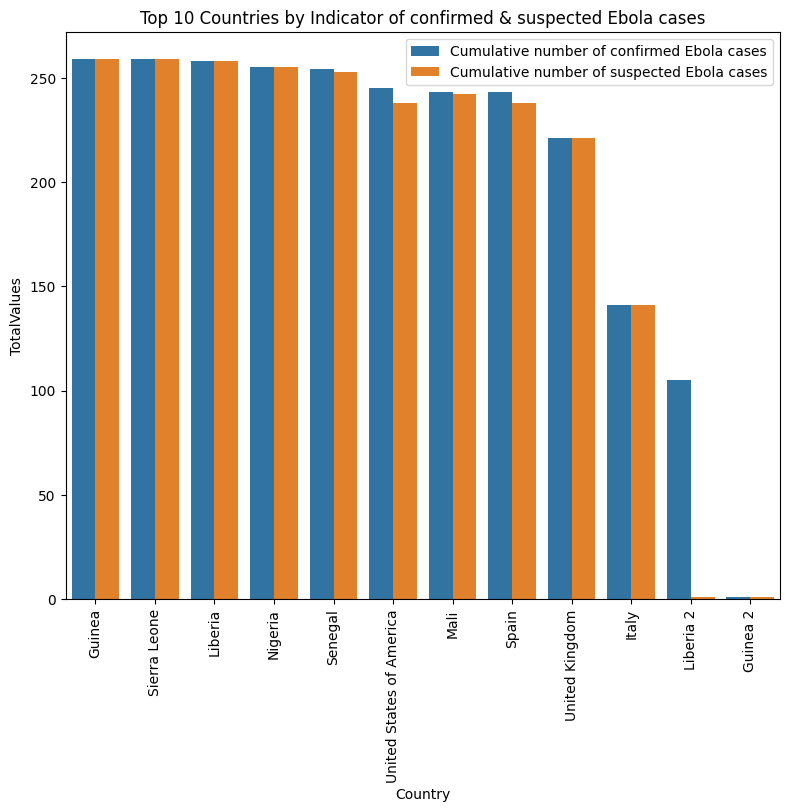

In [ ]:
graph=eb[(eb['Indicator']=="Cumulative number of suspected Ebola cases")| (eb['Indicator']=="Cumulative number of confirmed Ebola cases")]
top10_graph=graph.groupby(['Country','Indicator'])['value'].count().to_frame('TotalValues').sort_values(by='TotalValues',ascending=False).reset_index()
#print(top10_graph)
plt.figure(figsize=(8,8))
sns.barplot(x='Country',y='TotalValues',hue='Indicator',data=top10_graph)
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.tight_layout()
plt.title("Top 10 Countries by Indicator of confirmed & suspected Ebola cases")
plt.show()

Part II

In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from google.colab import drive
drive.mount('/content/drive')
song=pd.read_csv('/content/drive/MyDrive/Python training/Miniproject - python/song.csv')
print(song)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  song_title  rank  year
0    Mysong1     1  2012
1    Mysong1     1  2013
2    Mysong1     2  2014
3    Mysong1     3  2015
4    Mysong2     2  2012
5    Mysong2     2  2013
6    Mysong2     1  2014
7    Mysong2     2  2015
8    Mysong3     3  2012
9    Mysong3     3  2013


1. Read "song.csv" into a dataframe and then produce the following output.
Write Output For Ranked Songs By its Highest Frequency. Whichever song won a particular rank (say 2) with maximum frequency takes that place. For example, Mysong1 won rank 1 for two different years (achieved maximum frequency for that particular rank) and so in output (see row 1 in Output expected below), it should appear as Mysong1 with rank 1 and count 2..
(Note. in the same year, now two songs have same rank.)

The sample data with schema information is in the Appendix here.
Output expected:
song_title, rank, count
Mysong1, 1, 2
Mysong2, 2, 3
Mysong3, 3, 2


In [ ]:
op=song.groupby(['song_title'])['rank'].value_counts().groupby(level=0).head(1).to_frame('frequency').reset_index()
op.columns=['song_title','rank','frequency']
print(op)


  song_title  rank  frequency
0    Mysong1     1          2
1    Mysong2     2          3
2    Mysong3     3          2


2.House Price Prediction task.
Data: Housing.csv from Kaggle
Steps:
Pre-processing: Convert non-numeric columns (mainroad, guestroom, basement, hotwaterheating, airconditioning) to numeric using one-hot encoding if the column values are not inter-related. If column values are related, need to use ordinal encoding.
Pre-processing: Use pd.get_dummies to convert the one-hot encoding from the previous step into single columns. [link | link]
Use two-fold cross-validation [sklearn]  and predict (use linear regression) the house price (column "price") using features (all columns except "price" are the features). You need output evaluation metrics: R1-squared error, Mean Squared Error (MSE), Root Mean Squared Error (RMSE). Mean Average Error (MAE). See doc for some short introduction for the evalaution metrics.
Some sample basic code notebook for Linear Regression (also use internet for more) that starts with import of LinearRegression from sklearn.linear_model.


In [10]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from google.colab import drive
drive.mount('/content/drive')
house=pd.read_csv('/content/drive/MyDrive/Python training/Miniproject - python/Housing.csv')
print(house.head(3))
oe=OrdinalEncoder()
ohe=OneHotEncoder(handle_unknown='ignore')
house['mainroad']=oe.fit_transform(house[['mainroad']])
house['guestroom']=oe.fit_transform(house[['guestroom']])
house['basement']=oe.fit_transform(house[['basement']])
house['hotwaterheating']=oe.fit_transform(house[['hotwaterheating']])
house['airconditioning']=oe.fit_transform(house[['airconditioning']])
print(house.head(3))
house1=house
house1['mainroad']=ohe.fit_transform(house1[['mainroad']])
house1['guestroom']=ohe.fit_transform(house1[['guestroom']])
house1['basement']=ohe.fit_transform(house1[['basement']])
house1['hotwaterheating']=ohe.fit_transform(house1[['hotwaterheating']])
house1['airconditioning']=ohe.fit_transform(house1[['airconditioning']])
print(house1.head(3))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3       1.0        0.0   
1  12250000  8960         4          4        4       1.0        0.0   
2  12250000  9960         3          2        2       

TypeError: sparse array length is ambiguous; use getnnz() or shape[0]